In [1]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

--2022-05-10 23:06:55--  https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/nilt43hyl1dx82k/dataset.zip [following]
--2022-05-10 23:06:56--  https://www.dropbox.com/s/raw/nilt43hyl1dx82k/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucae9a7d65cc0d5e9b11ea11742d.dl.dropboxusercontent.com/cd/0/inline/BlAaPpoxJ3f_AH-4jvi3mvGxYHmtOXiyOAwzZfecEx5kOk8Jui55_uljjOCXWkj8u5dISmUId5TrY3YOX2JvDODB_jyzvZeGSyD5nNgXLJQASlC3w_on3hTcT6sAyRuySEaVy4gFQwati3f8zbFVVgajHvTT_XF-voWO6u8rllL1fA/file# [following]
--2022-05-10 23:06:56--  https://ucae9a7d65cc0d5e9b11ea11742d.dl.dropboxusercontent.com/cd/0/inline/BlAaPpoxJ3f_AH-4jvi3mvGxYHmtOXiyOAwzZfecEx5kOk8Jui55_uljjOCXWkj8u5

In [ ]:
!unzip dataset.zip?dl=0

In [3]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow
from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

In [4]:
# Working with pre trained model 

base = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base.layers:
  layer.trainable = False


x = Flatten()(base.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base.input, x)

17235968/17225924 [==============================] - 0s 0us/step


In [5]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [6]:
data_train = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = data_train.flow_from_directory(directory= "/content/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [7]:
test_data_gen = ImageDataGenerator(rescale = 1./255 )

test_data = test_data_gen.flow_from_directory(directory= "/content/test", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


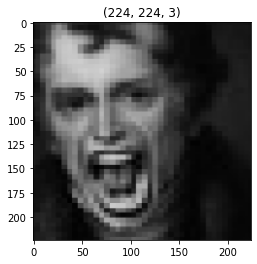

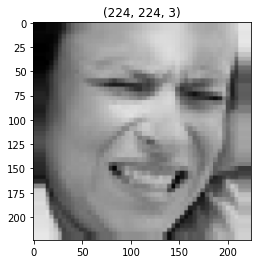

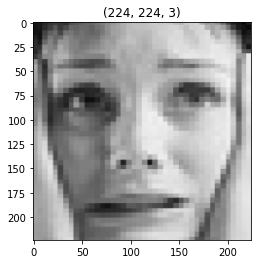

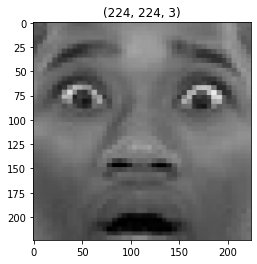

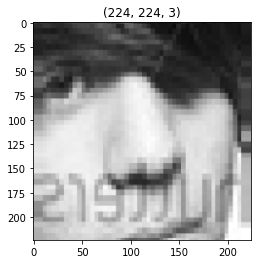

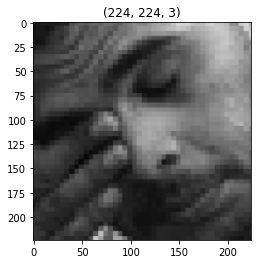

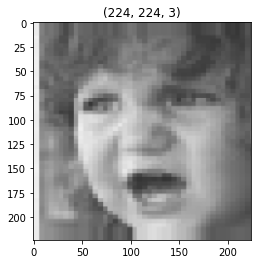

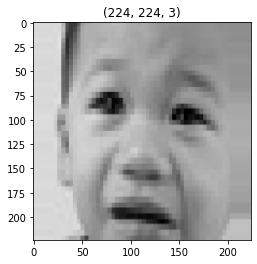

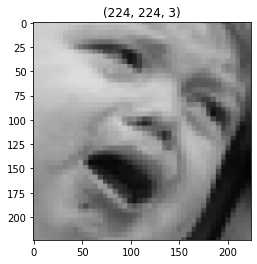

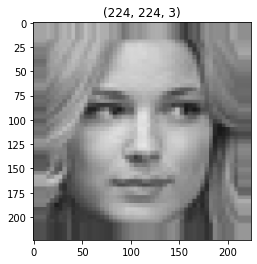

In [8]:
# to visualize the images in the traing data

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function to plot the images 
def plotImages(img_arr, label):
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

# function call to plot the images 
plotImages(t_img, label)

In [11]:
## early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
earlystop = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
modelcheck = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

call_back = [earlystop, modelcheck]

In [23]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data= test_data, 
                           validation_steps= 8, 
                           callbacks=[earlystop,modelcheck])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 6.2519 - accuracy: 0.3812
Epoch 1: val_accuracy improved from 0.44141 to 0.47656, saving model to best_model.h5
10/10 [==============================] - 24s 2s/step - loss: 6.2519 - accuracy: 0.3812 - val_loss: 5.7517 - val_accuracy: 0.4766
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 5.2919 - accuracy: 0.4281
Epoch 2: val_accuracy improved from 0.47656 to 0.48828, saving model to best_model.h5
10/10 [==============================] - 22s 2s/step - loss: 5.2919 - accuracy: 0.4281 - val_loss: 4.9060 - val_accuracy: 0.4883
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 5.9398 - accuracy: 0.4344
Epoch 3: val_accuracy did not improve from 0.48828
10/10 [==============================] - 22s 2s/step - loss: 5.9398 - accuracy: 0.4344 - val_loss: 7.0996 - val_accuracy: 0.4141
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 6.0809 - accuracy: 0.3938
Epoch 4: val_a

In [24]:
# Loading the best fit model 
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [25]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

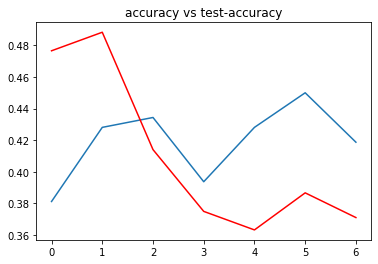

In [26]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("accuracy vs test-accuracy")
plt.show()

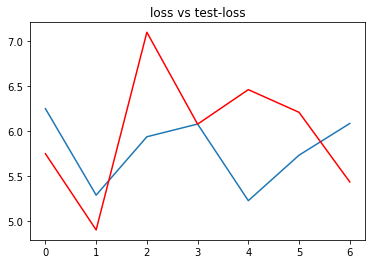

In [27]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs test-loss")
plt.show()

In [28]:
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

 the image is of sad


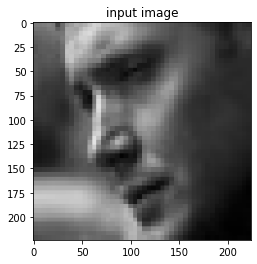

In [29]:
path = "/content/test/angry/PrivateTest_1054527.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

predicted = np.argmax(model.predict(input_arr))

print(f" the image is of {op[predicted]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

 the image is of happy


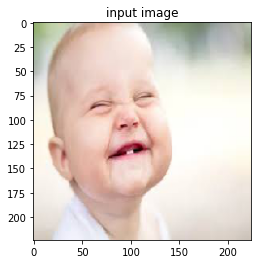

In [30]:
path = "/content/images.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()